In [1]:
import pandas as pd
import numpy as np

In [2]:
app = pd.read_csv('../data/application_train.csv')

Random under-sampling:
0    24825
1    24825
Name: TARGET, dtype: int64


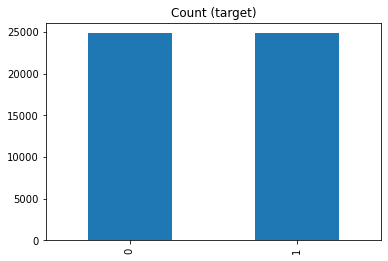

In [3]:
count_class_0, count_class_1 = app.TARGET.value_counts()
df_class_0 = app[app['TARGET'] == 0]
df_class_1 = app[app['TARGET'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
app = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(app.TARGET.value_counts())

app.TARGET.value_counts().plot(kind='bar', title='Count (target)');

In [4]:
POS_CASH_balance =  pd.read_csv('../data/POS_CASH_balance.csv')
installments_payments =  pd.read_csv('../data/installments_payments.csv')
installments_payments['MONTHS_BALANCE'] = (installments_payments['DAYS_INSTALMENT']/30).round().astype(int)

bure = pd.read_csv('../data/bureau.csv')
bure_b = pd.read_csv('../data/bureau_balance.csv')

In [5]:
df = pd.merge(app,POS_CASH_balance, how='left')
df = pd.merge(df,installments_payments, how='left')
df = pd.merge(df,bure, how='left')
df = pd.merge(df,bure_b, how='left')

## Separate static and continuos

In [36]:
is_static = dict((col,True) for col in df.columns)


for sk in df['SK_ID_CURR'].unique():
    df_sliced = df[df['SK_ID_CURR']==sk]
    for col in df.columns[1:]:
        x = len(df_sliced[col].unique())
        if x >1:
            is_static[col] = False

In [45]:
static=[ k for k, v in is_static.items() if v == True ]
continus =[ k for k, v in is_static.items() if v == False ]

## select most important continous features


In [51]:
 continus.remove([['SK_ID_PREV', 'MONTHS_BALANCE']])

ValueError: list.remove(x): x not in list

In [52]:
dfconti_pivot = df[continus].pivot_table(values=list(set(continus)-set(['SK_ID_PREV', 'MONTHS_BALANCE'])), index=['SK_ID_CURR'], columns='MONTHS_BALANCE')

KeyError: 'SK_ID_CURR'